Please use the attached data file to construct a K-nearest neighbor (KNN) classifier with various different numbers (remember k has to be odd), starting from k = 1 to some numbers (preferably a large range).

**Do the following:**

1. Use the 5-fold Cross-Validation (CV) method to find out the Expected Prediction Error (EPE) using KNN for different k, please also compute the Residual Sum of Squares (RSS).
2. Put these EPE and RSS errors vs. k (it has to be at least more than 10 different values of k) on a plot.
3. According to your plot (which is a bias-variance trade-off plot for model complexity), answer the following questions:
   1. How does the value of k control the model complexity?
   2. What's the optimal k?

*The code will have to be in a Jupyter notebook file when you submit.*

Feature and target variable selection. We use LPSA as a target and drop the train column for the features as we do CV on the dataset 

In [76]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('prostate.txt', sep=',')

X = data.drop(columns=['lpsa', 'train'])
y = data['lpsa']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
data

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,True
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,True
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,True
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,True
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,True
...,...,...,...,...,...,...,...,...,...,...
92,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,True
93,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,True
94,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124,False
95,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509,True


1. **lcavol**: Logarithm of cancer volume

2. **lweight**: Logarithm of prostate weight

3. **age**: Age of the patient

4. **lbph**: Logarithm of benign prostatic hyperplasia amount

5. **svi**: Seminal vesicle invasion

6. **lcp**: Logarithm of capsular penetration

7. **gleason**: Gleason score 

8. **pgg45**: Percentage of Gleason scores 4 or 5

9. **lpsa**: Logarithm of prostate-specific antigen - Prostate-specific antigen (PSA) is a protein produced by normal, as well as malignant, cells of the prostate gland. The PSA test measures the level of PSA in a man’s blood, and this column represents its logarithmic transformation. PSA levels are used for screening and monitoring prostate cancer. --> Target 

10. **train**: Indicates whether the data point is part of the training set


The RSS for a model is given by the equation:

$$
RSS(f) = \sum_{i=1}^{N} (y_i - f(x_i))^2
$$

The *RSS* evaluates the total squared deviation of the observed responses in the dataset from the responses predicted by the model. It is a measure of the discrepancy between the data and an estimation model. 

Maximization Rationale: Scikit-learn's model evaluation (e.g., cross_val_score, GridSearchCV) assumes that a higher score is better. Hence, we take the negative sum of the deviation to fit this framework

In [77]:
from sklearn.metrics import make_scorer
import numpy as np

def rss_scorer(y, y_pred):
    return -np.sum((y - y_pred) ** 2)

# adapting to scikit-learn's cross_val_score function.
rss = make_scorer(rss_scorer, greater_is_better=True)

KNN with Cross Validation

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

k_values = range(1, 77, 2) 
epe_scores = []
rss_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
    epe_scores.append(-cv_scores.mean())
    cv_scores_rss = cross_val_score(knn, X_scaled, y, cv=5, scoring=rss)
    rss_scores.append(-cv_scores_rss.mean())

Saving to file for analysis purposes - may skip

In [79]:
results_df = pd.DataFrame({
    'k': list(k_values),
    'EPE': epe_scores,
    'RSS': rss_scores
})
csv_file_path = 'knn_performance.csv'

results_df.to_csv(csv_file_path, index=False)

Visualization

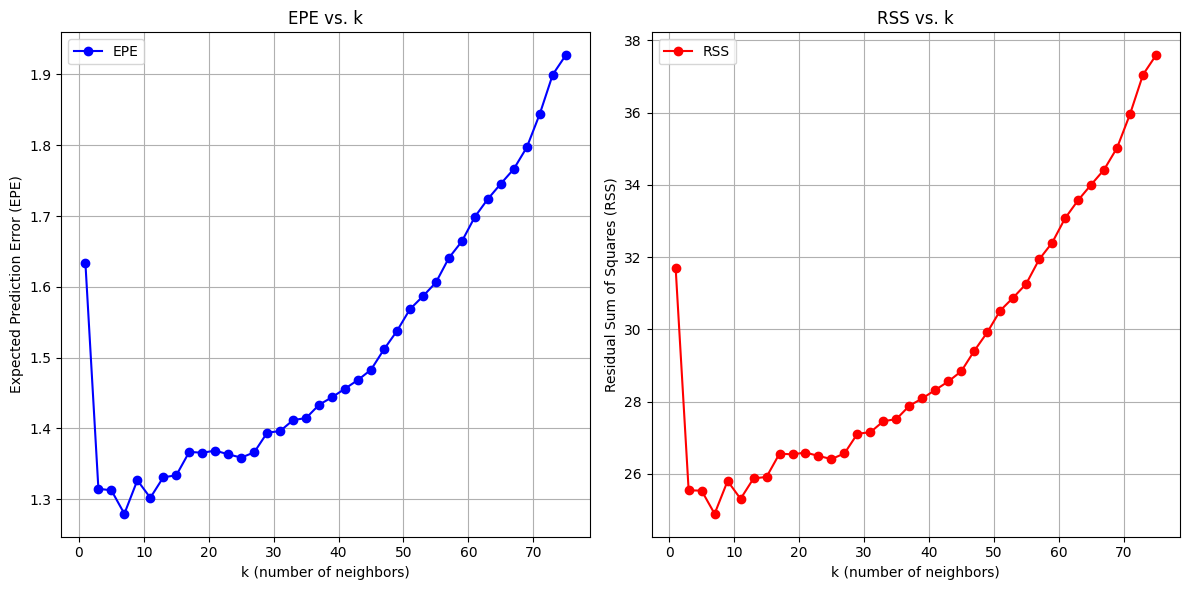

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, epe_scores, marker='o', linestyle='-', color='blue', label='EPE')
plt.title('EPE vs. k')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Expected Prediction Error (EPE)')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(k_values, rss_scores, marker='o', linestyle='-', color='red', label='RSS')
plt.title('RSS vs. k')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Residual Sum of Squares (RSS)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

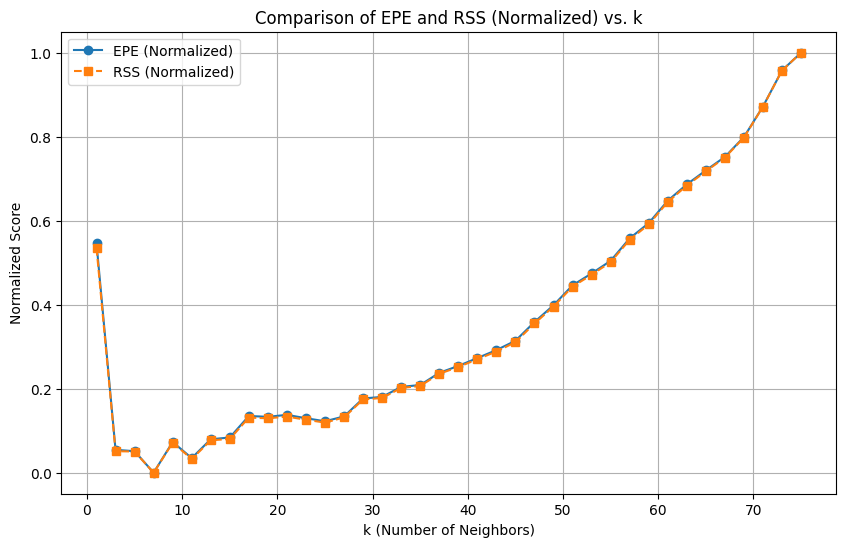

In [81]:
import numpy as np
import matplotlib.pyplot as plt


epe_normalized = (epe_scores - np.min(epe_scores)) / (np.max(epe_scores) - np.min(epe_scores))
rss_normalized = (rss_scores - np.min(rss_scores)) / (np.max(rss_scores) - np.min(rss_scores))

plt.figure(figsize=(10, 6))
plt.plot(k_values, epe_normalized, label='EPE (Normalized)', marker='o', linestyle='-')
plt.plot(k_values, rss_normalized, label='RSS (Normalized)', marker='s', linestyle='--')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Normalized Score')
plt.title('Comparison of EPE and RSS (Normalized) vs. k')
plt.legend()
plt.grid(True)
plt.show()